In [3]:
import pandas as pd
###
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
###
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
###

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
print(device)

cuda


In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [18]:
# diabetes_data = pd.read_csv('/content/drive/MyDrive/Data_for_life_science_Diabetes_Prediction/diabetes.csv')
diabetes_data = pd.read_csv('diabetes.csv')

In [8]:
# Check for missing values
missing_values = diabetes_data.isnull().sum()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Load the dataset
df_ml = diabetes_data.copy()

# Preprocessing
X = df_ml.drop('Outcome', axis=1)
y = df_ml['Outcome']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Defining multiple classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=1000, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Training and evaluating each model
best_model, best_score = None, 0
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{name} Accuracy: {accuracy}")
    if accuracy > best_score:
        best_model = clf
        best_score = accuracy

# Best model
print("Best Model:", best_model)


Random Forest Accuracy: 0.7402597402597403
Gradient Boosting Accuracy: 0.7402597402597403
Logistic Regression Accuracy: 0.7532467532467533
Support Vector Machine Accuracy: 0.7272727272727273
K-Nearest Neighbors Accuracy: 0.6883116883116883
Best Model: LogisticRegression()


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define the parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  # Algorithm to use in the optimization problem
}

# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Setup the grid search
grid_search_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, verbose=1, scoring='accuracy')

# Fit the grid search to the data
grid_search_lr.fit(X_train, y_train)

# Print the best parameters
best_params_lr = grid_search_lr.best_params_
print("Best Parameters for Logistic Regression:", best_params_lr)

# Retrain the model with the best parameters
best_log_reg = LogisticRegression(**best_params_lr)
best_log_reg.fit(X_train, y_train)

# Evaluate the model
predictions = best_log_reg.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Accuracy of Logistic Regression with best parameters:", accuracy)
print("Classification Report:\n", report)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Parameters for Logistic Regression: {'C': 10, 'solver': 'newton-cg'}
Accuracy of Logistic Regression with best parameters: 0.7532467532467533
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [11]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

# Best parameters from hyperparameter tuning (replace these with your actual best parameters)
best_params_rf = {'n_estimators': 100, 'max_depth': 100}  # Example parameters
best_params_gb = {'n_estimators': 100, 'learning_rate': 0.02}  # Example parameters

# Initialize the models with the best parameters
log_reg = LogisticRegression(C=10, solver='newton-cg')
random_forest = RandomForestClassifier(**best_params_rf)
gradient_boosting = GradientBoostingClassifier(**best_params_gb)

# Create a Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('lr', log_reg), ('rf', random_forest), ('gb', gradient_boosting)],
    voting='hard'
)

# Train the ensemble classifier
voting_clf.fit(X_train, y_train)

# Evaluate the model
predictions = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Accuracy of Ensemble Model:", accuracy)
print("Classification Report:\n", report)


Accuracy of Ensemble Model: 0.7792207792207793
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83        99
           1       0.71      0.65      0.68        55

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.78      0.78      0.78       154



In [12]:
# Check current shape
print("Current shape of X_train:", X_train.shape)

# Reshape (assuming you want to treat each feature as a separate time step)
# This reshapes X_train to [samples, features, 1]
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("New shape of X_train:", X_train_reshaped.shape)

# Now use X_train_reshaped in place of X_train for LSTM
input_dim = X_train_reshaped.shape[2]  # This should now work without error


Current shape of X_train: (614, 8)
New shape of X_train: (614, 8, 1)


In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import xgboost
from sklearn.model_selection import GridSearchCV
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pickle

df_my = diabetes_data.copy()
X = df_my.iloc[:, :-1].values
y = df_my.iloc[:, -1].values
y = pd.get_dummies(y)
norm = StandardScaler()
X    = norm.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the XGBoost model and perform hyperparameter tuning
xgboost = xgboost.XGBClassifier(
    gamma=0.1,
    eta=0.001,
    n_estimators=50
)

param_gs_xgboost = [{'gamma':[0.1, 0.2, 0.3],
                     'eta':[1e-3, 1e-2],
                     'n_estimators':[50, 100]
                    }]

gs_xgboost = GridSearchCV(estimator=xgboost,
                          param_grid=param_gs_xgboost,
                          scoring='accuracy',
                          cv=3)

gs_XGBoost = gs_xgboost.fit(X_train, y_train)

# Save the XGBoost model
xgboost_model = gs_XGBoost.best_estimator_
with open('xgboost_model.pkl', 'wb') as model_file:
    pickle.dump(xgboost_model, model_file)

# Define your PyTorch neural network model
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(8, 10)
        self.fc2 = nn.Linear(10, 20)
        self.fc3 = nn.Linear(20, 30)
        self.fc4 = nn.Linear(30, 20)
        self.fc5 = nn.Linear(20, 17)
        self.fc6 = nn.Linear(17, 15)
        self.fc7 = nn.Linear(15, 10)
        self.fc8 = nn.Linear(10, 15)
        self.fc9 = nn.Linear(15, 8)
        self.fc10 = nn.Linear(8, 4)
        self.fc11 = nn.Linear(4, 2)
        self.relu = nn.ELU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.relu(self.fc5(x))
        x = self.relu(self.fc6(x))
        x = self.relu(self.fc7(x))
        x = self.relu(self.fc8(x))
        x = self.relu(self.fc9(x))
        x = self.relu(self.fc10(x))
        x = self.fc11(x)
        return x

# Create an instance of your PyTorch model and move it to the GPU
model = MyModel().to(device)

# Define optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)
criterion = nn.CrossEntropyLoss()

# Convert your data to PyTorch tensors and move them to the GPU
X_train = torch.FloatTensor(X_train).to(device)
y_train = torch.LongTensor(np.argmax(y_train.values, axis=1)).to(device)
X_test = torch.FloatTensor(X_test).to(device)
y_test = torch.LongTensor(np.argmax(y_test.values, axis=1)).to(device)

# Create data loaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
# Training loop for the PyTorch model
epochs = 20
for epoch in range(epochs):
    model.train()
    total_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f'Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader)}')

# Evaluate the PyTorch model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy on test data (PyTorch model): {accuracy}%')


Epoch 1/20, Loss: 0.6832260345169507
Epoch 2/20, Loss: 0.6571673389031678


KeyboardInterrupt: 

In [30]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Load and preprocess your diabetes dataset
df_my = diabetes_data.copy()
X = df_my.iloc[:, :-1].values
y = df_my.iloc[:, -1].values
y = pd.get_dummies(y)
norm = StandardScaler()
X = norm.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define a more complex RNN model
class ComplexRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(ComplexRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # Define a deeper RNN architecture
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)

        # Define additional hidden layers
        self.fc1 = nn.Linear(hidden_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)

        # Define the fully connected layer for output
        self.fc_out = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # Forward propagate RNN
        out, _ = self.rnn(x, h0)

        # Apply additional hidden layers
        out = torch.relu(self.fc1(out))
        out = torch.relu(self.fc2(out))

        # Decode the hidden state of the last time step
        out = self.fc_out(out[:, -1, :])
        return out

# Define hyperparameters for the more complex model
input_size = X_train.shape[1]
hidden_size = 128  # Increase the number of hidden units
output_size = y_train.shape[1]
num_layers = 3  # Increase the number of RNN layers
sequence_length = 1
learning_rate = 0.001
num_epochs = 100

# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train).view(-1, sequence_length, input_size)
y_train_tensor = torch.FloatTensor(y_train.values).view(-1, sequence_length, output_size)

# Create the more complex RNN model
model = ComplexRNN(input_size, hidden_size, output_size, num_layers)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    outputs = model(X_train_tensor)
    optimizer.zero_grad()

    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Save the trained model
torch.save(model.state_dict(), 'complex_rnn_model.pth')

# Test the more complex model
model.eval()
with torch.no_grad():
    test_input = torch.FloatTensor(X_test).view(-1, sequence_length, input_size)
    predicted_output = model(test_input)
    print("Predicted Output Shape:", predicted_output.shape)


c:\Users\haoda\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([537, 1, 2])) that is different to the input size (torch.Size([537, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [10/100], Loss: 0.2352
Epoch [20/100], Loss: 0.2410
Epoch [30/100], Loss: 0.2339
Epoch [40/100], Loss: 0.2324
Epoch [50/100], Loss: 0.2314
Epoch [60/100], Loss: 0.2310
Epoch [70/100], Loss: 0.2308
Epoch [80/100], Loss: 0.2308
Epoch [90/100], Loss: 0.2308
Epoch [100/100], Loss: 0.2308
Predicted Output Shape: torch.Size([231, 2])


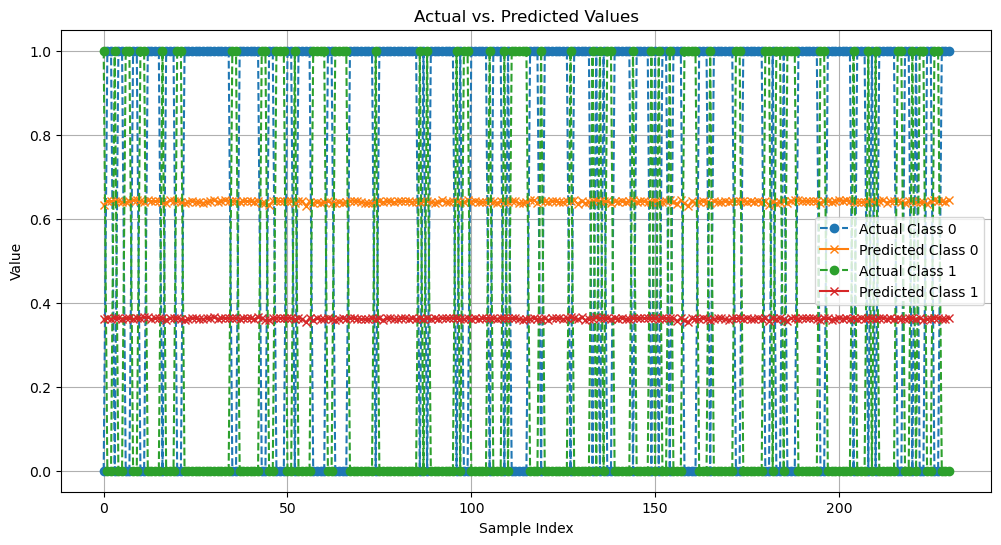

In [31]:
import matplotlib.pyplot as plt

# Convert the predicted output tensor to a NumPy array
predicted_output = predicted_output.view(-1, output_size).cpu().numpy()

# Convert the true values tensor to a NumPy array
true_values = y_test.values

# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(true_values[:, 0], label='Actual Class 0', linestyle='--', marker='o')
plt.plot(predicted_output[:, 0], label='Predicted Class 0', linestyle='-', marker='x')
plt.plot(true_values[:, 1], label='Actual Class 1', linestyle='--', marker='o')
plt.plot(predicted_output[:, 1], label='Predicted Class 1', linestyle='-', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


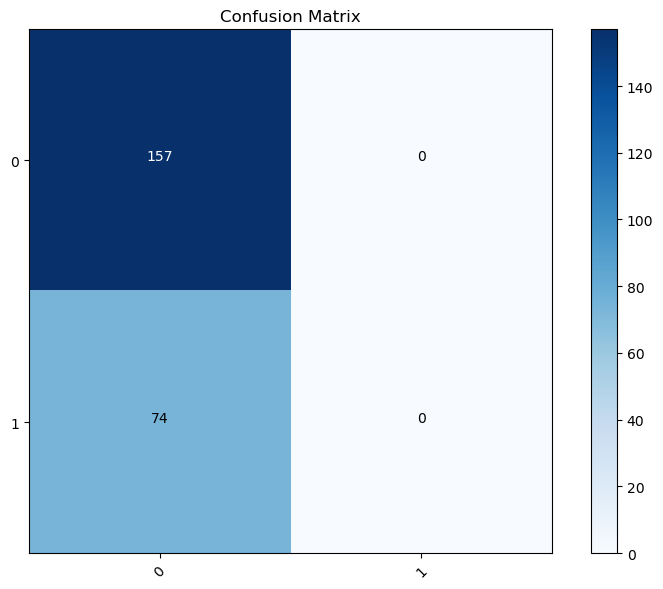

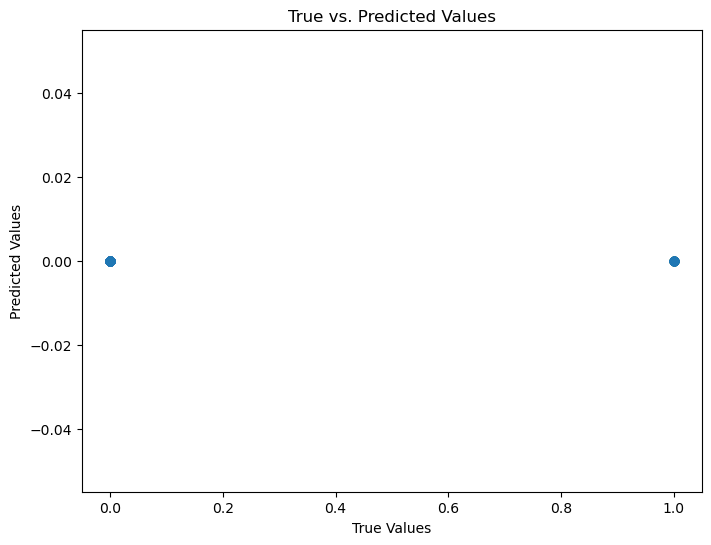

In [33]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools  # Import itertools for labeling the confusion matrix

model.eval()
with torch.no_grad():
    test_input = torch.FloatTensor(X_test).view(-1, sequence_length, input_size)
    predicted_output = model(test_input)

# Evaluate the model on the test data
y_pred = predicted_output.numpy()
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test.values, axis=1)
classes = np.unique(y_train)

# Create a confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(classes)), classes, rotation=45)
plt.yticks(np.arange(len(classes)), classes)

# Add labels to the confusion matrix cells
thresh = confusion_mtx.max() / 2.
for i, j in itertools.product(range(confusion_mtx.shape[0]), range(confusion_mtx.shape[1])):
    plt.text(j, i, format(confusion_mtx[i, j], 'd'),
             horizontalalignment="center",
             color="white" if confusion_mtx[i, j] > thresh else "black")

plt.tight_layout()

# Plot predicted vs. true values
plt.figure(figsize=(8, 6))
plt.scatter(y_true_classes, y_pred_classes, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')

plt.show()

In [23]:
import torch
from sklearn.metrics import mean_squared_error
import math

# Convert the predicted_output tensor to a NumPy array
predicted_values = predicted_output.view(-1).cpu().numpy()

# Calculate RMSE (Root Mean Square Error)
rmse = math.sqrt(mean_squared_error(y_test, predicted_values))

print(f"RMSE: {rmse:.4f}")


ValueError: Found input variables with inconsistent numbers of samples: [231, 462]